In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
#Getting column names Measurment
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [20]:
#printing column names Station
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [21]:
# Find the most recent date in the measurment data set.
MRD = session.query(func.max(Measurement.date)).first()
MRD

('2017-08-23')

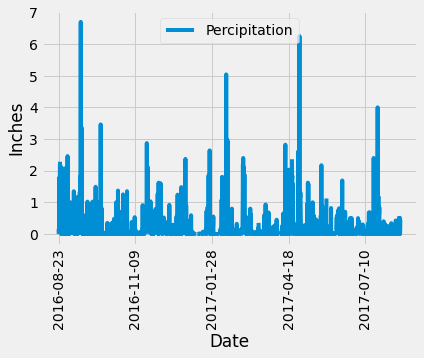

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

p_year = dt.date(2017,8,23)- dt.timedelta(days=365)
#Displya value
    #p_year

# Perform a query to retrieve the data and precipitation scores
date_percipation = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= p_year).order_by(Measurement.date)
#Displya value
#date_percipation

# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(date_percipation, columns=['Date','Percipitation'])

#another way to rename columns
    #percipitation_df = percipitation_df.rename(columns={"prcp":"Percipitation"})

#Display new column names in df
climate_df

# Sort the dataframe by date
# percipitation_df.sort_values(by = "Date")

# Use Pandas Plotting with Matplotlib to plot the data
climate_df.plot("Date", "Percipitation", label='Percipitation', ylabel = "Inches" )
plt.xticks(rotation = 90)
plt.show()


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data

climate_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset

#Here I used the fun function imported above
total_stations = session.query(func.count(Station.station)).all()

#To be able to neatly display the number of stations I used this python code
total_stations = session.query(Station.station).count()
print(f"There are a total of {total_stations} stations in the dataset")

There are a total of 9 stations in the dataset


In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations_q = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
most_active_stations = active_stations_q.all()
most_active_station = active_stations_q.first()[0]
print(f"The most active station of the data set is station ID {most_active_station}")
print("This is the list of the most active stations by station ID in the data set:")
most_active_stations

The most active station of the data set is station ID USC00519281
This is the list of the most active stations by station ID in the data set:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
results 

[(54.0, 85.0, 71.66378066378067)]

In [27]:
#This is another way to get the same result from above
query = f'''
SELECT MIN(tobs),MAX(tobs), AVG(tobs)
FROM measurement
WHERE station = "{most_active_station}"
'''
active_station_query = engine.execute(query).fetchall()
active_station_query

[(54.0, 85.0, 71.66378066378067)]

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
p_year = dt.date(2017,8,23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date_temperature = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= p_year).filter(Measurement.station == 'USC00519281').order_by(Measurement.date)
date_temperature_df = pd.DataFrame(date_temperature, columns=['Date','Temp'])
date_temperature_df.head()


,Date,Temp
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


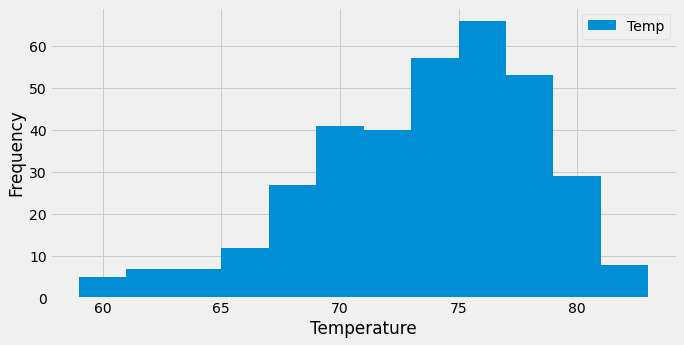

In [29]:
# plot the results as a histogram
date_temperature_df.plot.hist(bins=12, figsize=(10,5))
plt.xlabel ("Temperature")
plt.show;


# Close session

In [30]:
# Close Session
session.close()